In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import ast

# Duopoly

In [106]:
df = pd.read_csv("game_dynamics/duopoly/results.csv")

/var/folders/11/3vmp2wls5_xb0s9pfn4zdp580000gq/T/ipykernel_26560/420438175.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("game_dynamics/duopoly/results.csv")


In [107]:
means = df.groupby(["n_actions", "alpha", "epsilon"]).mean()
var = df.groupby(["n_actions", "alpha", "epsilon"]).var()

In [111]:
heatmap_mean = pd.pivot_table(means.loc[:,0.105,:], values='Lyapunov', index=['n_actions'], columns='epsilon')

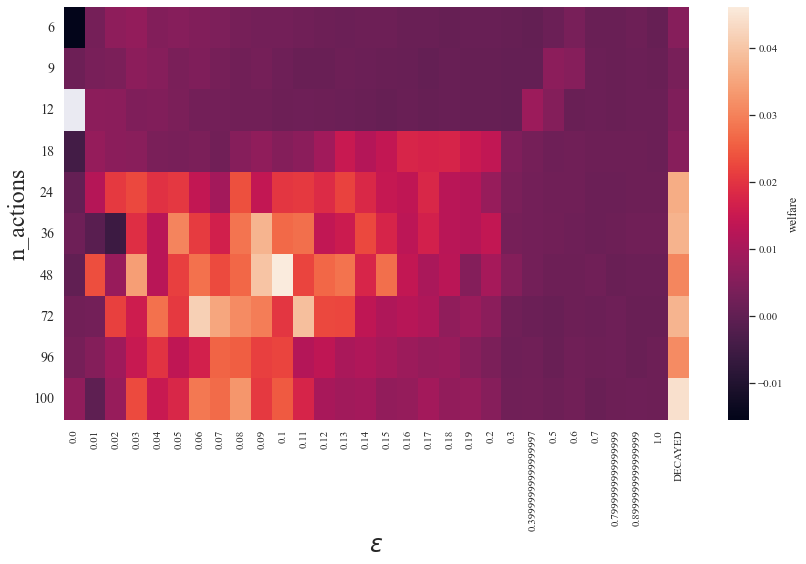

In [112]:
plt.figure(figsize=(12,8))
sns.set(font='Times New Roman')
sns.heatmap(heatmap_mean, cbar_kws={'label': 'welfare'})
plt.xlabel(r"$\epsilon$", size=24, rotation='horizontal')
# plt.xticks(np.linspace(0, 101, 5), np.linspace(0, 1, 5), rotation='horizontal', size=14)
plt.ylabel(r"n_actions", size=24, rotation='vertical')
plt.yticks(rotation='horizontal', size=14)
# plt.title("Average Travel Time, 100 agents, 10000 learning steps", size=14)
plt.tight_layout()
# plt.savefig('heatmap_travel_time_mean.pdf',dpi=150, figsize=(9,6))

<AxesSubplot:xlabel='n_actions'>

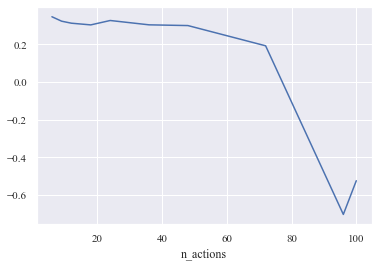

In [118]:
means.loc[:, 0.105, "DECAYED"]["T_mean"].plot()

In [115]:
df["n_actions"].values

array([  6,   6,   6, ..., 100, 100, 100])

In [21]:
df

,n_actions,alpha,epsilon,T_mean,T_mean_all,T_std,Lyapunov,Qvar_mean
0,6,0.01,0.0,0.416667,0.347204,5.551115e-17,-0.003283,0.016430
1,6,0.01,0.0,0.416667,0.347204,5.551115e-17,-0.003283,0.016430
2,6,0.01,0.0,0.416667,0.347204,5.551115e-17,-0.003283,0.016430
3,6,0.01,0.0,0.416667,0.347204,5.551115e-17,-0.003283,0.016430
4,6,0.01,0.0,0.416667,0.347204,5.551115e-17,-0.003283,0.016430
...,...,...,...,...,...,...,...,...
131995,100,0.20,DECAYED,0.279090,-5.550725,2.155934e+00,-0.006281,2.268630
131996,100,0.20,DECAYED,0.250000,-6.212454,0.000000e+00,0.039705,2.754884
131997,100,0.20,DECAYED,0.036424,-8.266861,3.358152e+00,-0.003279,5.329904
131998,100,0.20,DECAYED,0.259243,-7.617779,3.564918e+00,0.094798,4.826439


In [29]:
df["T_mean"]

0         0.416667
1         0.416667
2         0.416667
3         0.416667
4         0.416667
            ...   
131995    0.279090
131996    0.250000
131997    0.036424
131998    0.259243
131999    0.333333
Name: T_mean, Length: 132000, dtype: float64

<AxesSubplot:xlabel='epsilon'>

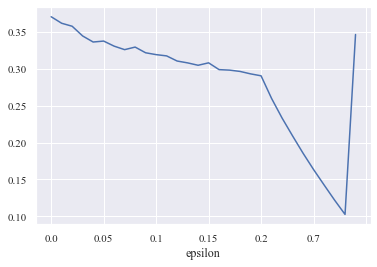

In [32]:
means.loc[6, 0.105, :]["T_mean"].plot()

# Two-Route

In [3]:
df = pd.read_csv("game_dynamics/two_route/braess_augmented_results.csv")

In [4]:
rows=[]
for i, row in df.iterrows():
    for col in df.columns:
        rows.append(ast.literal_eval(row[col]))

In [5]:
df = pd.DataFrame(rows)

In [10]:
df

,repetition,n_agents,alpha,epsilon,cost,T_mean,T_mean_all,T_std,Lyapunov,Qvar_mean
0,0,100,0.01,0.0,0.0,-0.999839,-0.993811,0.001350,0.003813,0.000607
1,1,100,0.01,0.0,0.0,-0.999745,-0.993770,0.002110,-0.001708,0.000684
2,2,100,0.01,0.0,0.0,-0.999816,-0.994033,0.001604,0.046190,0.000645
3,3,100,0.01,0.0,0.0,-0.999785,-0.993817,0.002097,0.000602,0.000670
4,4,100,0.01,0.0,0.0,-0.999757,-0.993835,0.002300,-0.009739,0.000582
...,...,...,...,...,...,...,...,...,...,...
1451995,35,1000,0.20,DECAYED,0.5,-0.999578,-0.968870,0.000689,-0.000565,0.000057
1451996,36,1000,0.20,DECAYED,0.5,-0.999599,-0.968809,0.000641,-0.000241,0.000057
1451997,37,1000,0.20,DECAYED,0.5,-0.999605,-0.968798,0.000642,-0.000989,0.000055
1451998,38,1000,0.20,DECAYED,0.5,-0.999589,-0.968822,0.000662,-0.000286,0.000055


In [6]:
means = df.groupby(["n_agents", "epsilon", "alpha", "cost"]).mean()
var = df.groupby(["n_agents", "epsilon", "alpha", "cost"]).var()

In [7]:
df["alpha"].values

array([0.01, 0.01, 0.01, ..., 0.2 , 0.2 , 0.2 ])

In [19]:
heatmap_mean = pd.pivot_table(means.loc[:,:,0.01,0.5], values='T_mean', index=['n_agents'], columns='epsilon')

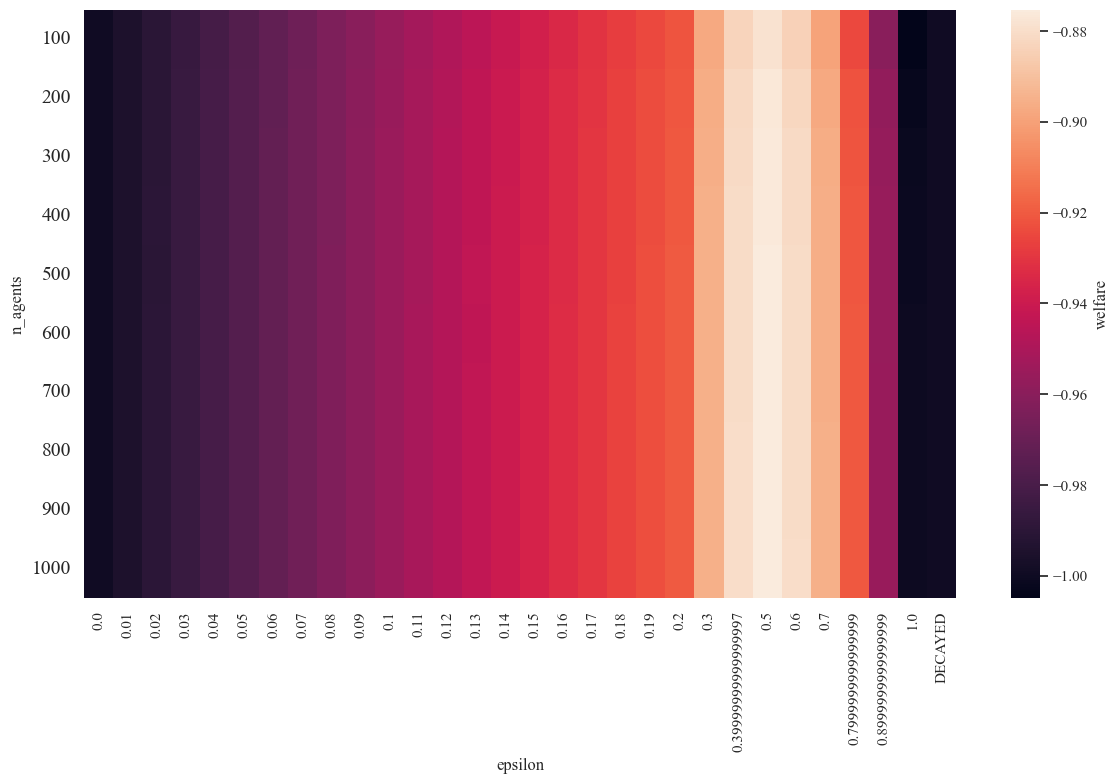

In [20]:
plt.figure(figsize=(12,8))
sns.set(font='Times New Roman')
sns.heatmap(heatmap_mean, cbar_kws={'label': 'welfare'})
# plt.xlabel(r"$\epsilon$", size=24, rotation='horizontal')
# plt.xticks(np.linspace(0, 101, 5), np.linspace(0, 1, 5), rotation='horizontal', size=14)
# plt.ylabel(r"n_actions", size=24, rotation='vertical')
plt.yticks(rotation='horizontal', size=14)
# plt.title("Average Travel Time, 100 agents, 10000 learning steps", size=14)
plt.tight_layout()
# plt.savefig('heatmap_travel_time_mean.pdf',dpi=150, figsize=(9,6))

# Braess

In [61]:
df = pd.read_csv("game_dynamics/braess_augmented/results.csv")

In [62]:
rows=[]
for i, row in df.iterrows():
    for col in df.columns:
        rows.append(ast.literal_eval(row[col]))

In [63]:
df = pd.DataFrame(rows)

In [64]:
means = df.groupby(["n_agents", "epsilon", "alpha", "cost"]).mean()
var = df.groupby(["n_agents", "epsilon", "alpha", "cost"]).var()

In [65]:
df["alpha"].values

array([0.01, 0.01, 0.01, ..., 0.2 , 0.2 , 0.2 ])

In [74]:
heatmap_agents = pd.pivot_table(means.loc[1000,:,:,0], values='T_mean', index=['alpha'], columns='epsilon')

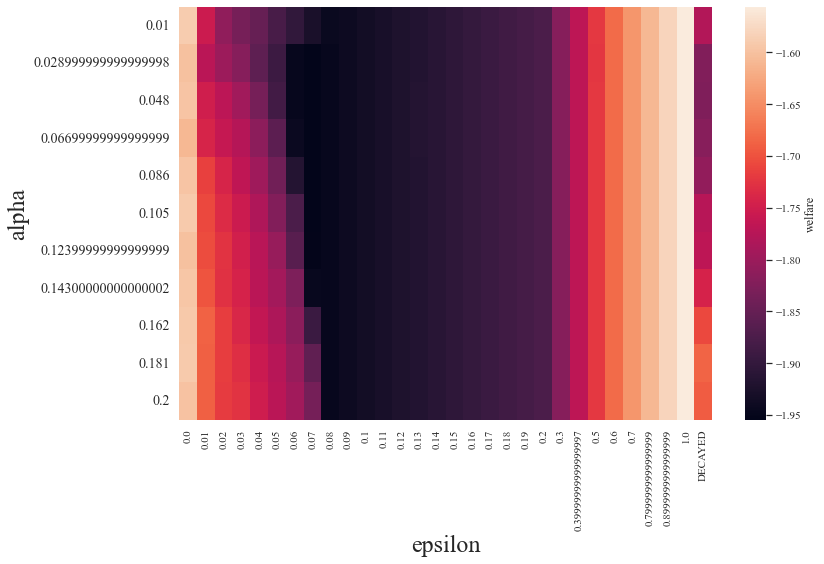

In [97]:
plt.figure(figsize=(12,8))
sns.set(font='Times New Roman')
sns.heatmap(heatmap_agents, cbar_kws={'label': 'welfare'})
plt.xlabel(r"epsilon", size=24, rotation='horizontal')
# plt.xticks(np.linspace(0, 101, 5), np.linspace(0, 1, 5), rotation='horizontal', size=14)
plt.ylabel(r"alpha", size=24, rotation='vertical')
plt.yticks(rotation='horizontal', size=14)
# plt.title("Average Travel Time, 100 agents, 10000 learning steps", size=14)
plt.tight_layout()
# plt.savefig('heatmap_travel_time_mean.pdf',dpi=150, figsize=(9,6))

In [100]:
means.loc[100, :, :, 0]["T_mean"]

epsilon  alpha
0.0      0.010   -1.600888
         0.029   -1.611803
         0.048   -1.605463
         0.067   -1.593545
         0.086   -1.603560
                    ...   
DECAYED  0.124   -1.670525
         0.143   -1.651788
         0.162   -1.669958
         0.181   -1.639689
         0.200   -1.650075
Name: T_mean, Length: 330, dtype: float64

In [87]:
heatmap_decay = pd.pivot_table(means.loc[:,"DECAYED",:,0], values='T_mean', index=['alpha'], columns='n_agents')

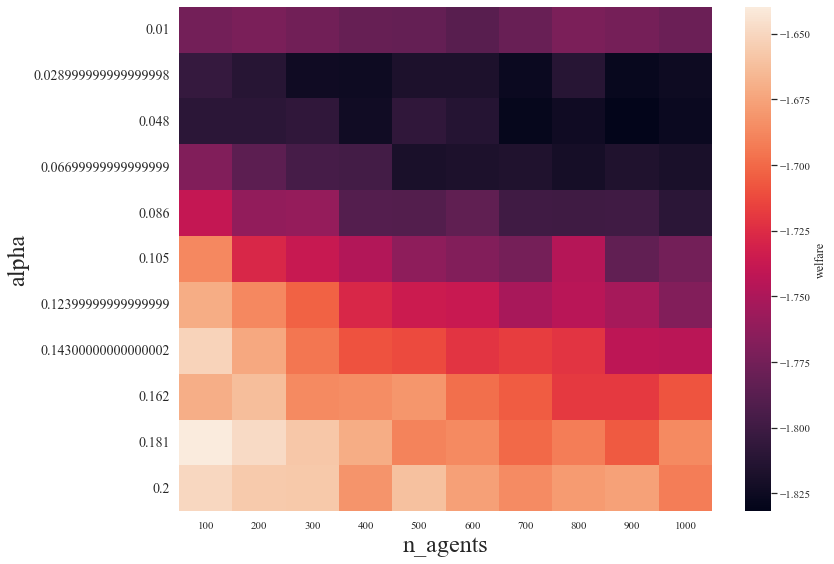

In [88]:
plt.figure(figsize=(12,8))
sns.set(font='Times New Roman')
sns.heatmap(heatmap_decay, cbar_kws={'label': 'welfare'})
plt.xlabel(r"n_agents", size=24, rotation='horizontal')
# plt.xticks(np.linspace(0, 101, 5), np.linspace(0, 1, 5), rotation='horizontal', size=14)
plt.ylabel(r"alpha", size=24, rotation='vertical')
plt.yticks(rotation='horizontal', size=14)
# plt.title("Average Travel Time, 100 agents, 10000 learning steps", size=14)
plt.tight_layout()
# plt.savefig('heatmap_travel_time_mean.pdf',dpi=150, figsize=(9,6))

In [95]:
heatmap_cost = pd.pivot_table(means.loc[100,"DECAYED",:,:], values='T_mean', index=['alpha'], columns='cost')

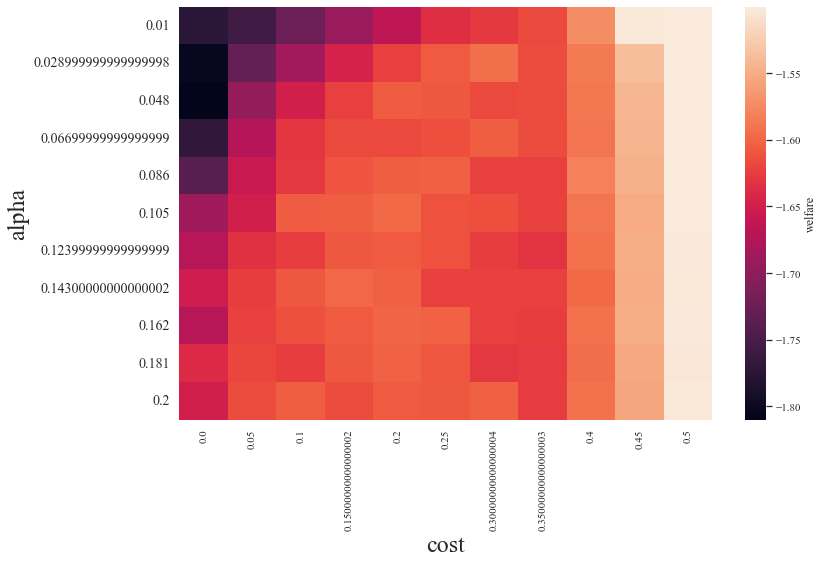

In [96]:
plt.figure(figsize=(12,8))
sns.set(font='Times New Roman')
sns.heatmap(heatmap_cost, cbar_kws={'label': 'welfare'})
plt.xlabel(r"cost", size=24, rotation='horizontal')
# plt.xticks(np.linspace(0, 101, 5), np.linspace(0, 1, 5), rotation='horizontal', size=14)
plt.ylabel(r"alpha", size=24, rotation='vertical')
plt.yticks(rotation='horizontal', size=14)
# plt.title("Average Travel Time, 100 agents, 10000 learning steps", size=14)
plt.tight_layout()
# plt.savefig('heatmap_travel_time_mean.pdf',dpi=150, figsize=(9,6))

<AxesSubplot:xlabel='epsilon'>

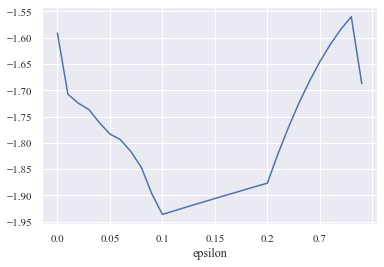

In [105]:
means.loc[100, :, 0.105, 0]["T_mean"].plot()